# 01. Importing Libraries & Data

In [1]:
#### Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#### Define path
pickle_file_path = os.path.join(
    r'C:\Users\cemel\Documents\30-12-2023 Instacart Basket Analysis (Achievement 4)',
    '02 Data', 'Prepared Data', 'ords_prods_agg_pythonviz.pkl'
)

In [3]:
#### Load the pickle file into Pandas DataFrame
df_pyviz = pd.read_pickle(pickle_file_path)

## Check the Output

In [4]:
df_pyviz.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,...,mean_order_frequency,order_frequency_flag,first_name,surname,gender,state,age,dependants,family_status,income
user_id,,,,,,,,,,,,,,,,,,,,,
115,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,3278419,9,4,18,4.0,...,10.0,Frequent Customer,Carol,Soto,Female,Idaho,77,3,married,98736
138,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,28,6,11,3.0,...,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,1,married,49620
138,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,30,6,17,20.0,...,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,1,married,49620
225,9,Light Strawberry Blueberry Yogurt,120,16,7.0,169443,11,4,10,6.0,...,15.0,Regular customer,Elizabeth,Tapia,Female,Montana,76,3,married,69724
295,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,2287043,7,4,13,1.0,...,6.0,Frequent Customer,John,Harris,Male,Rhode Island,51,2,married,167566


In [5]:
df_pyviz.shape

(32404859, 30)

# 02. Creating a histogram of the 'order_hour_of_day' (renamed 'time_of_day') column 

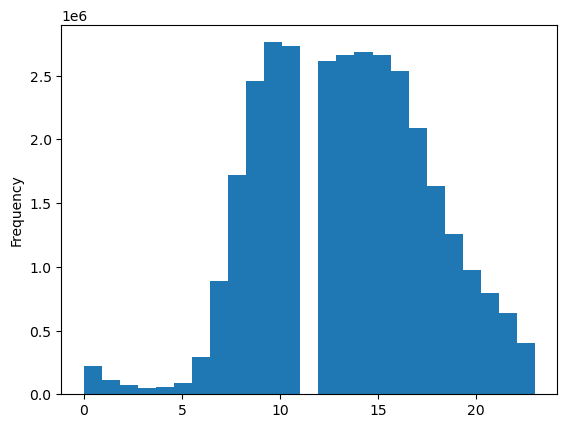

In [6]:
hist_pyviz = df_pyviz['time_of_day'].plot.hist(bins = 25)

In [7]:
#### Run describe() function against 'time_of_day' column
df_pyviz['time_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: time_of_day, dtype: float64

### Comments: Based on the histogram, it is clear that most orders are placed between 9-5PM, with peak hours being 9-11AM. I suspect that the gap in the graph from 12-1PM is due to the fact that this is the typical lunch hour. 

# 03.  Create a bar chart from the “loyalty_flag” column.

In [8]:
#### Ensuring presence of 'loyalty_flag' column
df_pyviz.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'orders_day_of_week', 'time_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spender_flag', 'mean_order_frequency',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'dependants', 'family_status', 'income'],
      dtype='object')

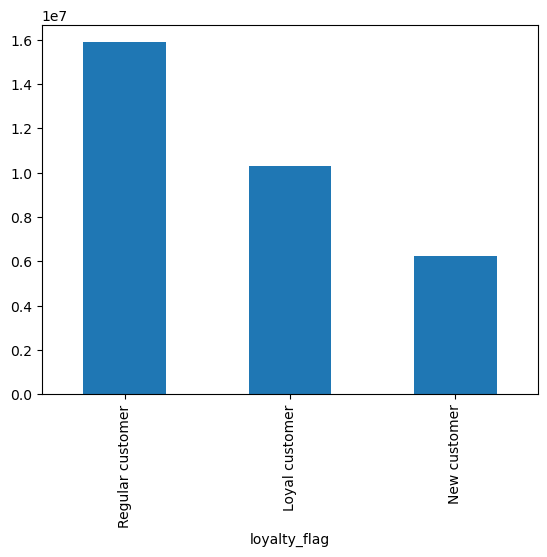

In [9]:
#### Creating a bar chart for your 'loyalty_flag' column
bar_pyviz = df_pyviz['loyalty_flag'].value_counts().plot.bar()

# 04. Checking whether there’s a difference in expenditure (the 'prices' column) depending on the hour of the day (i.e. 'time_of_day')

## Analyzing distribution of 'prices' and 'time_of_day' column for determining differences in expenditure depending on 'time_of_day'

In [10]:
#### Analyzing 'prices' column
df_pyviz['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### Comments: Anticipate outliers based on max value in 'prices' column as shown in stats

## Conduct an exploratory analysis using scatterplots to visualize the distribution of data points in order to identify any outliers based on max value in 'prices' column as shown in stats.

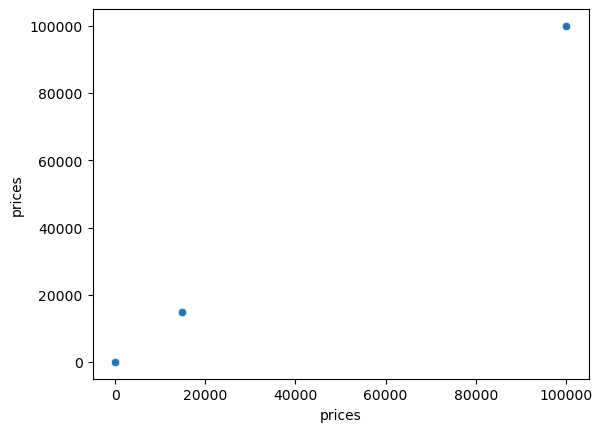

In [11]:
#### Plotting the 'prices' column against itself using a scatterplot
scatplot_pyviz = sns.scatterplot(x = 'prices', y = 'prices',data = df_pyviz)

### Comments: Scatterplot result confirms suspicion about outlier value(s). Consequently, additional exploratory checks will be conducted on the data.

## Assume maximum price for any item is less than or equal to $100 (Outliers > $100). 

In [12]:
#### Check for 'prices' above $100
df_pyviz.loc[df_pyviz['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,...,mean_order_frequency,order_frequency_flag,first_name,surname,gender,state,age,dependants,family_status,income
user_id,,,,,,,,,,,,,,,,,,,,,
17,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,12,2,14,5.0,...,5.0,Frequent Customer,Barbara,Chang,Female,Kansas,39,3,married,150659
17,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,22,6,16,4.0,...,5.0,Frequent Customer,Barbara,Chang,Female,Kansas,39,3,married,150659
135,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,2,2,21,13.0,...,12.0,Regular customer,nan,Chen,Female,Maryland,30,3,married,120635
135,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,3,0,8,12.0,...,12.0,Regular customer,nan,Chen,Female,Maryland,30,3,married,120635
342,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,8,1,19,30.0,...,23.0,Non_frequent_customer,Ruby,Bates,Female,Minnesota,56,2,married,187328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204099,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,29,0,8,4.0,...,4.0,Frequent Customer,Gary,Wilson,Male,Washington,48,3,married,536156
204099,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,31,0,9,2.0,...,4.0,Frequent Customer,Gary,Wilson,Male,Washington,48,3,married,536156
204395,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,13,3,15,8.0,...,5.0,Frequent Customer,Shirley,Ellis,Female,Missouri,78,3,married,137004


In [13]:
#### Turn outlier values (values > $100) in 'prices' column into missing values (NaNs)
df_pyviz.loc[df_pyviz['prices'] >100, 'prices'] = np.nan

In [14]:
#### Checking whether the replacement was successful by running a max-value check on 'prices' column
df_pyviz['prices'].max()

25.0

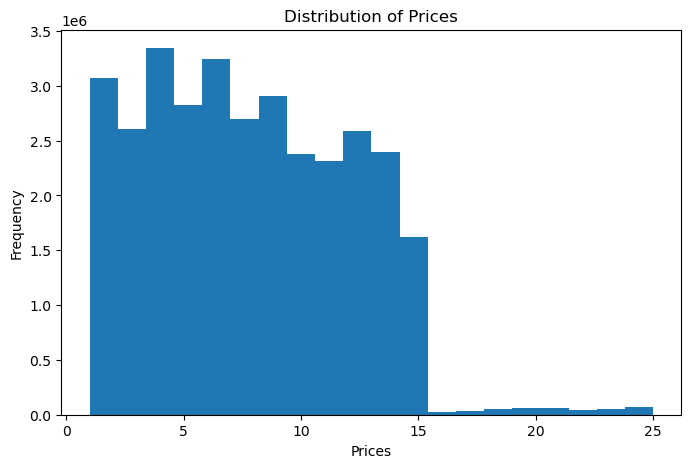

In [15]:
#### Creating histogram of 'prices' column after ad-hoc data cleaning with labels for analysis
hist2_pyviz = plt.figure(figsize=(8, 5))
plt.hist(df_pyviz['prices'], bins=20)
plt.title('Distribution of Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

## Splitting 'df_pyviz' dataframe into two randomized samples at a 70/30 ratio

In [16]:
#### Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_pyviz)) <= 0.7

In [17]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [18]:
#### Store 70% of the sample into the dataframe big
big = df_pyviz[dev]

In [19]:
#### Store 30% of the sample into the dataframe small
small = df_pyviz[~dev]

## Check to see if two new sample subsets (i.e. big & small) equal original dataframe

In [20]:
#### Check for exact number of rows between new sample subsets and 'df_pyviz' df using len()
len(df_pyviz)

32404859

In [21]:
len(big) + len(small)

32404859

## Speeding up processing time by reducing sample to columns necessary for chart

In [22]:
#### Creating a new dataframe, df_pyviz_2, that contains only the 'prices' and 'time_of_day' columns from small subset
df_pyviz_2 = small[['time_of_day','prices']]

## Line chart comparing 'time_of_day' to 'prices'  in order to highlight difference in expenditure based on hour of the day

In [23]:
#### Check for duplicates 
print(df_pyviz_2['time_of_day'][df_pyviz_2['time_of_day'].duplicated()])

user_id
721       13
764       17
764       13
1298      13
1414      16
          ..
206161    12
206161    11
206161    11
206191    14
206194    23
Name: time_of_day, Length: 9721074, dtype: int8


In [24]:
#### Because duplicates may be meaningful, aggregate the data based on the 'time_of_day' before plotting.
df_pyviz_2 = df_pyviz_2.groupby('time_of_day')['prices'].mean().reset_index()

C:\Users\cemel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cemel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


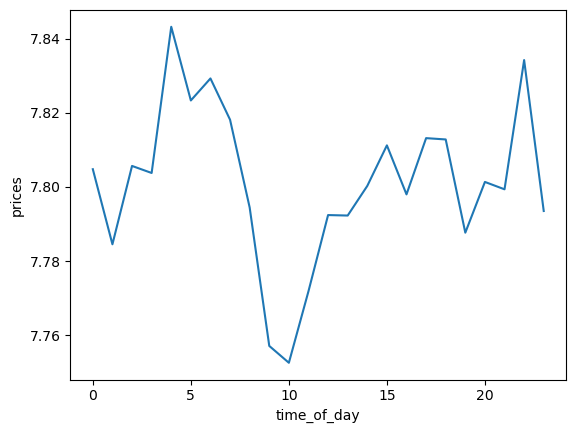

In [25]:
#### Create line chart
line_pyviz = sns.lineplot(data = df_pyviz_2, x = 'time_of_day',y = 'prices')

# 05. Creating a line chart exploring the connections between age and number of dependants

In [26]:
#### Creating a new dataframe, df_pyviz_2, that contains only the 'age' and 'dependants' columns from small subset
df_pyviz_3 = small[['age','dependants']]

C:\Users\cemel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cemel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


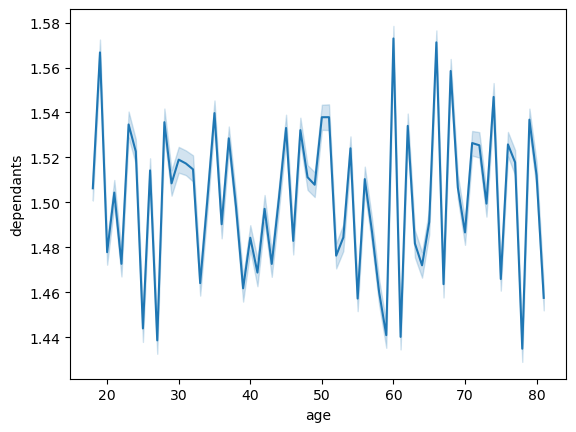

In [27]:
#### Create line chart using 'df_pyviz_3'
line2_pyviz = sns.lineplot(data=df_pyviz_3, x='age', y='dependants')

### Comments: The line plot does not evidence a correlation between age and number of dependants. 

# 06. Create a scatterplot using the 'sns.scatterplot()' function to visualize relationship between age and spending power (income). 

In [28]:
#### Creating a new dataframe, df_pyviz_4, that contains only the 'age' and 'income' columns from small subset
df_pyviz_4 = small[['age','income']]

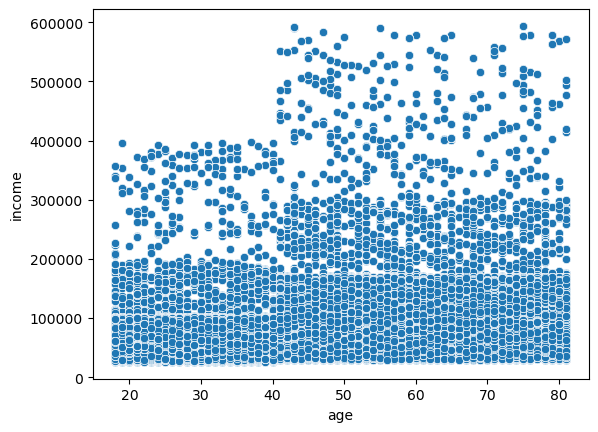

In [29]:
#### Create a scatterplot to see if there is a connection between 'age' and 'income'
scatplot2_pyviz = sns.scatterplot(data = df_pyviz_4 , x = 'age', y = 'income', )

### Comments: The highest density of income across all ages is $0 - $200K. The highest incomes ($500K - $600K) are for those greater than or equal to 40 years of age. 

# 07. Export all visualizations as “.png” files in the relevant project folder

In [30]:
#### Define path
path = r'C:\Users\cemel\Documents\30-12-2023 Instacart Basket Analysis (Achievement 4)'

In [31]:
####  Exporting ‘hist_pyviz’ outside of Jupyter in the form of an image file
hist_pyviz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_pyviz.png'))

In [32]:
####  Exporting ‘bar_pyviz’ outside of Jupyter in the form of an image file
bar_pyviz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pyviz.png'))

In [33]:
####  Exporting ‘scatplot_pyviz’ outside of Jupyter in the form of an image file
scatplot_pyviz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatplot_pyviz.png'))

In [34]:
####  Exporting ‘hist2_pyviz’ outside of Jupyter in the form of an image file
hist2_pyviz.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist2_pyviz.png'))

In [35]:
####  Exporting ‘line_pyviz’ outside of Jupyter in the form of an image file
line_pyviz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', ' line_pyviz.png'))

In [36]:
####  Exporting ‘line2_pyviz’ outside of Jupyter in the form of an image file
line2_pyviz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', ' line2_pyviz.png'))

In [37]:
####  Exporting ‘scatplot2_pyviz’ outside of Jupyter in the form of an image file
scatplot2_pyviz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatplot2_pyviz.png'))